# **PIZZA SHOP** - `Sales Analysis`

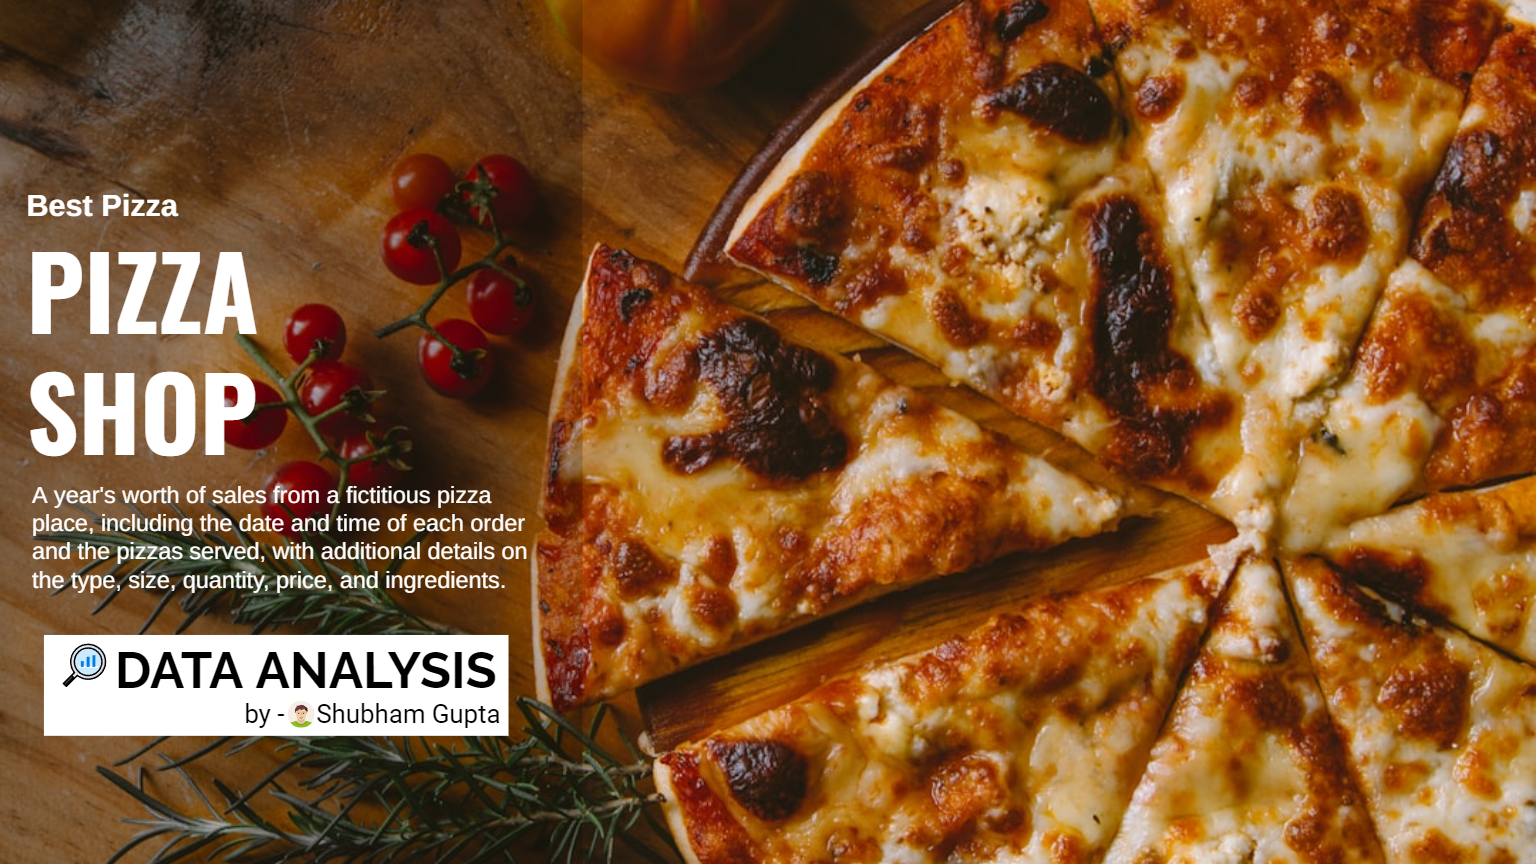

# Importing dependencies

In [1]:
import pandas as pd #data manipulation
import numpy as np #to deal with numbers
import matplotlib.pyplot as plt #plots
import seaborn as sns #plots
plt.style.use('ggplot') #style

### Load the Data

In [2]:
details_df = pd.read_csv('/content/drive/MyDrive/pizza/order_details.csv', encoding = 'utf-8')
orders_df = pd.read_csv('/content/drive/MyDrive/pizza/orders.csv', encoding = 'utf-8')
ptypes_df = pd.read_csv('/content/drive/MyDrive/pizza/pizza_types.csv', encoding='ISO-8859-1')
pizzas_df = pd.read_csv('/content/drive/MyDrive/pizza/pizzas.csv', encoding = 'utf-8')
#using respective encoding to read data

### Merging Data's

In [3]:
order_detail = orders_df.merge(details_df, on = 'order_id', how = 'inner') #merging details_df and orders_df

In [4]:
order_pizza = order_detail.merge(pizzas_df, on = 'pizza_id', how = 'inner') #merging order_details and pizzas_df

In [5]:
df = order_pizza.merge(ptypes_df, on ='pizza_type_id', how = 'inner') #merging order_pizza and ptypes_df and getting final dataframe "df"

### Final data

In [6]:
df.head()

order_id        date      time  order_details_id    pizza_id  quantity  \
0         1  2015-01-01  11:38:36                 1  hawaiian_m         1   
1        77  2015-01-02  12:22:46               179  hawaiian_m         1   
2       146  2015-01-03  14:22:10               357  hawaiian_m         1   
3       163  2015-01-03  16:54:54               389  hawaiian_m         1   
4       247  2015-01-04  20:55:29               568  hawaiian_m         1   

  pizza_type_id size  price                name category  \
0      hawaiian    M  13.25  The Hawaiian Pizza  Classic   
1      hawaiian    M  13.25  The Hawaiian Pizza  Classic   
2      hawaiian    M  13.25  The Hawaiian Pizza  Classic   
3      hawaiian    M  13.25  The Hawaiian Pizza  Classic   
4      hawaiian    M  13.25  The Hawaiian Pizza  Classic   

                                ingredients  
0  Sliced Ham, Pineapple, Mozzarella Cheese  
1  Sliced Ham, Pineapple, Mozzarella Cheese  
2  Sliced Ham, Pineapple, Mozzarella Cheese  
3  Sliced Ham, Pineapple, Mozzarella Cheese  
4  Sliced Ham, Pineapple, Mozzarella Cheese

# Data Cleaning and PreProcessing

In [7]:
df['month'] = pd.to_datetime(df['date'], format='%Y-%m-%d').dt.month_name() #month name

In [8]:
column_name = ['category','name','size','ingredients','month']

for i in column_name:
  df[i] = df[i].astype('category') #use loop the convert multiple column data type to 'category' data types

In [9]:
df['date'] = pd.to_datetime(df['date']) #converting date columns to datetime type

In [10]:
df['week_day'] = df['date'].dt.day_name()

In [11]:
df['number_of_ingredients'] = df['ingredients'].str.split(',').str.len() #getting the lens of ingredients

In [12]:
df['hour'] = df['time'].str.split(':').str.get(0) #spliting and getting hours

In [13]:
df = df.drop('pizza_id', axis = 1) #dropping piiza_id because it has duplicate context

In [14]:
df['price_range'] = None

In [15]:
df.loc[(df['price'] > 9) & (df['price'] < 13.99), 'price_range'] = '$9-$13'
df.loc[(df['price'] > 14) & (df['price'] < 16.99), 'price_range'] = '$14-$16'
df.loc[(df['price'] > 17) & (df['price'] < 19.99), 'price_range'] = '$17-$19'
df.loc[(df['price'] > 20) & (df['price'] < 23.99), 'price_range'] = '$20-$23'
df.loc[(df['price'] > 24) & (df['price'] < 30.99), 'price_range'] = '$23-$30'
df.loc[df['price'] > 31, 'price_range'] = '$31+'

In [16]:
df['hour_range'] = None

In [17]:
df.loc[df['hour'].isin(['09','10','11']), 'hour_range'] = '9hr-11hr'
df.loc[df['hour'].isin(['12','13','14']), 'hour_range'] = '12hr-14hr'
df.loc[df['hour'].isin(['15','16','17']), 'hour_range'] = '15hr-17hr'
df.loc[df['hour'].isin(['18','19','20']), 'hour_range'] = '18hr-20hr'
df.loc[df['hour'].isin(['21','22','23']), 'hour_range'] = '21hr-24hr'

# Exploration

### Pizza Shop Peak Hours

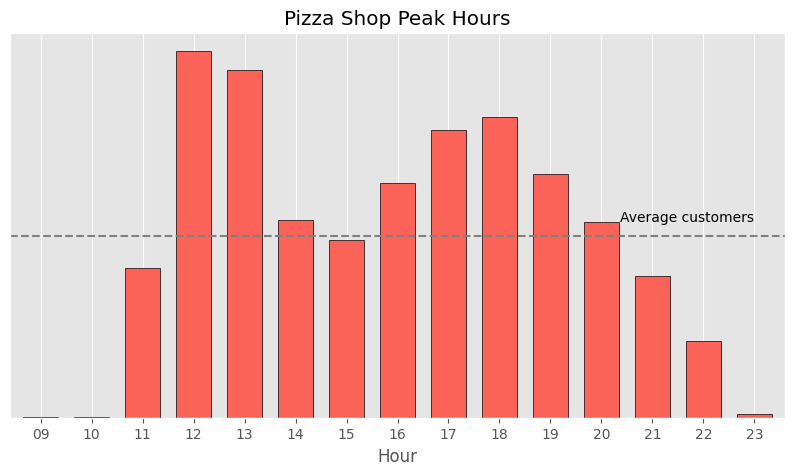

In [18]:
df['hour'].value_counts().sort_index(ascending = True).plot(kind = 'bar', figsize = (10,5), edgecolor='black', color = '#fc6358', width = 0.7)
plt.title('Pizza Shop Peak Hours')
plt.xlabel('Hour')
plt.xticks(rotation = 0)
plt.yticks([])
mean_value = df['hour'].value_counts().values.mean()

# Add a horizontal line at the mean value
plt.axhline(y=mean_value, color='grey', linestyle='--', label='Mean')
plt.text(14,3500,'Average customers', color='black', ha='right', fontweight = 'book')
plt.show()

### Top Selling Pizza of Each Category

In [119]:
catlist = ['Classic', 'Veggie', 'Supreme', 'Chicken']
top_pizza = {}

for i in catlist:
    pizzaname = df[df['category'] == i].groupby('name')['quantity'].sum().sort_values(ascending=False).head(1).index.to_list()
    top_pizza[i] = pizzaname[0]


In [131]:
pd.DataFrame(top_pizza, index=[0]).unstack().reset_index().rename(columns = {
    'level_0':'Pizza Category',0:'Pizza name'
}).drop('level_1', axis = 1)

Pizza Category                  Pizza name
0        Classic    The Classic Deluxe Pizza
1         Veggie       The Four Cheese Pizza
2        Supreme          The Sicilian Pizza
3        Chicken  The Barbecue Chicken Pizza

### Most Sold Pizzas in Peak Hours

In [19]:
pip install wordcloud

In [20]:
filterdf1 = df[df['hour'].isin(['12', '13', '17', '18'])]['name'].unique().to_list()
pizzalist = ' '.join(filterdf1)

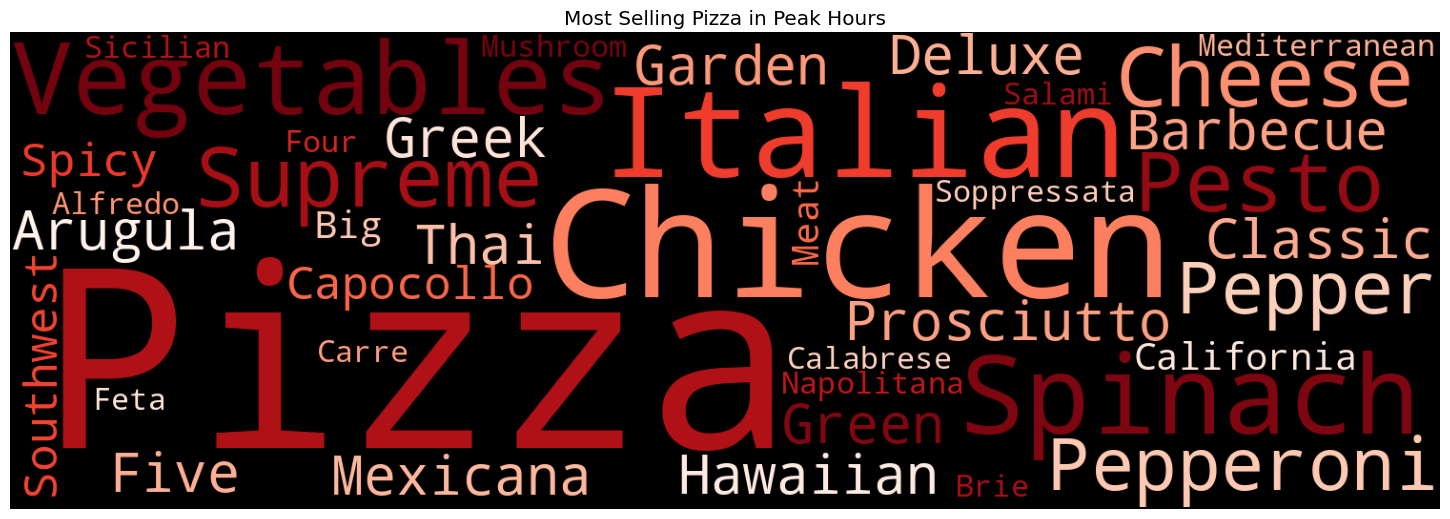

In [21]:
from wordcloud import WordCloud, STOPWORDS

# Generate the word cloud
wordcloud = WordCloud(width=1500, height=500, background_color='black',colormap = 'Reds_r', min_font_size=10).generate(pizzalist)

# Display the word cloud
plt.figure(figsize=(15, 5), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.title('Most Selling Pizza in Peak Hours')
plt.tight_layout(pad=0)
plt.show()

### Most Ingredients used on Pizza

In [22]:
filterdf2 = ' '.join(df['ingredients'].to_list())

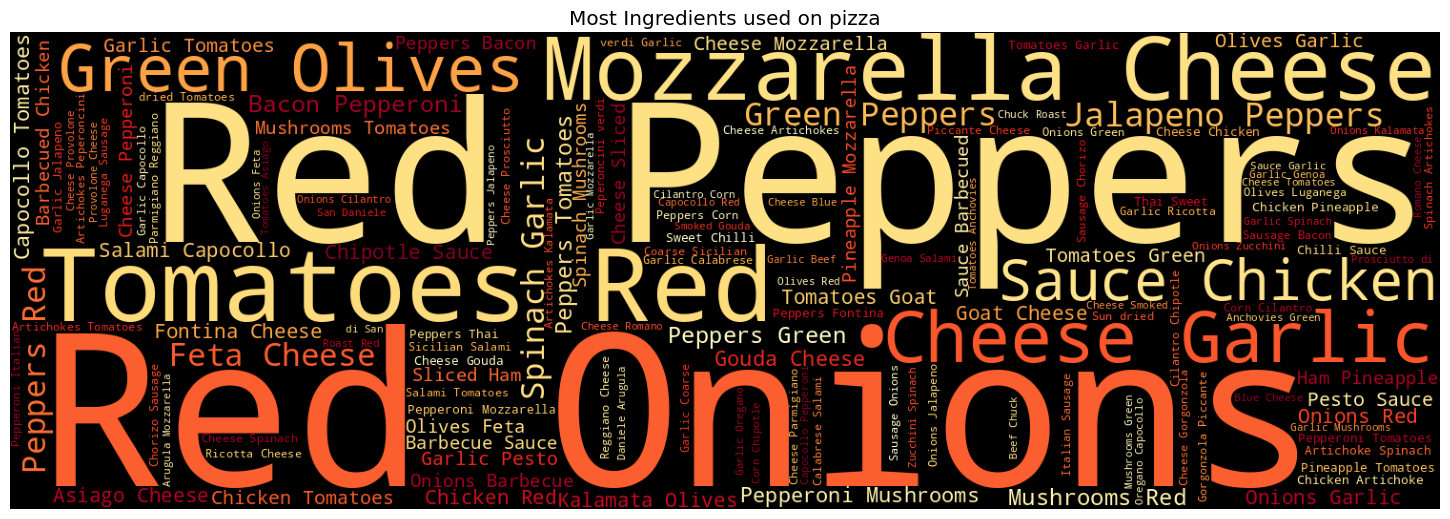

In [23]:
wordcloud = WordCloud(width=1500, height=500, background_color='black',colormap = 'YlOrRd', min_font_size=10).generate(filterdf2)

# Display the word cloud
plt.figure(figsize=(15, 5), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.title('Most Ingredients used on pizza')
plt.tight_layout(pad=0)
plt.show()

### Pizza Sales (2015)

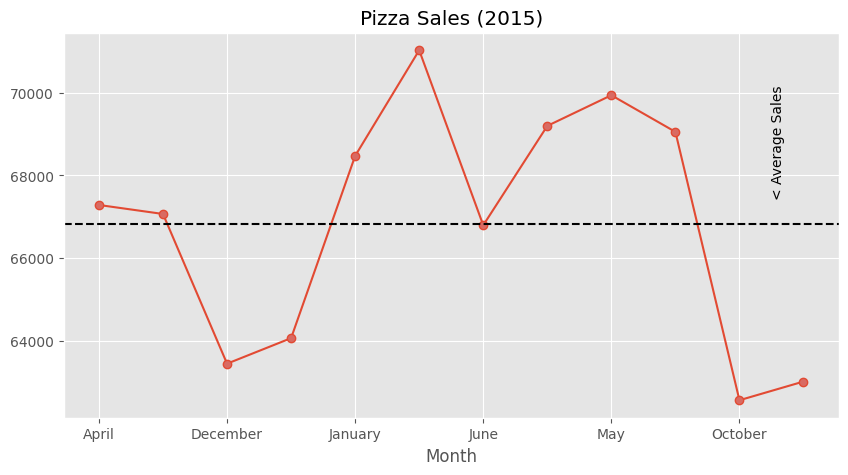

In [24]:
df.groupby('month')['price'].sum().plot(kind = 'line', marker = 'o', markerfacecolor='#d96a62' ,figsize = (10,5))
plt.axhline(y = df.groupby('month')['price'].sum().values.mean(), color = 'black', linestyle='--')
plt.text(10.5, 67500, '< Average Sales', rotation = 90 )
plt.xlabel('Month')
plt.title('Pizza Sales (2015)')
plt.show()

### Customer Preferences

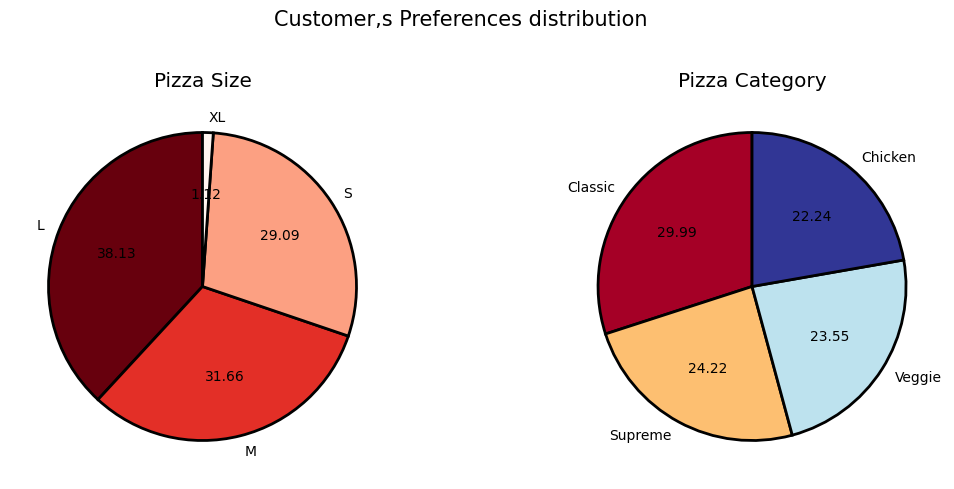

In [66]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(13, 5))

# Plot pie chart for 'size'
df['size'].value_counts().head(4).plot(kind='pie', ax=ax1, autopct = '%.2f',colormap = 'Reds_r',startangle = 90,
        wedgeprops = {"edgecolor" : "black",
                      'linewidth': 2,
                      'antialiased': True})
ax1.set_ylabel('')
ax1.set_title("Pizza Size")

# Plot pie chart for 'category'
df['category'].value_counts().plot(kind='pie', ax=ax2, autopct = '%.2f', colormap = 'RdYlBu',startangle = 90,
        wedgeprops = {"edgecolor" : "black",
                      'linewidth': 2,
                      'antialiased': True})
ax2.set_ylabel('')
ax2.set_title("Pizza Category")

plt.suptitle('Customer,s Preferences distribution', fontsize = 15, x=0.5, y=1.05)
plt.show()

### Price that Customer love to pay

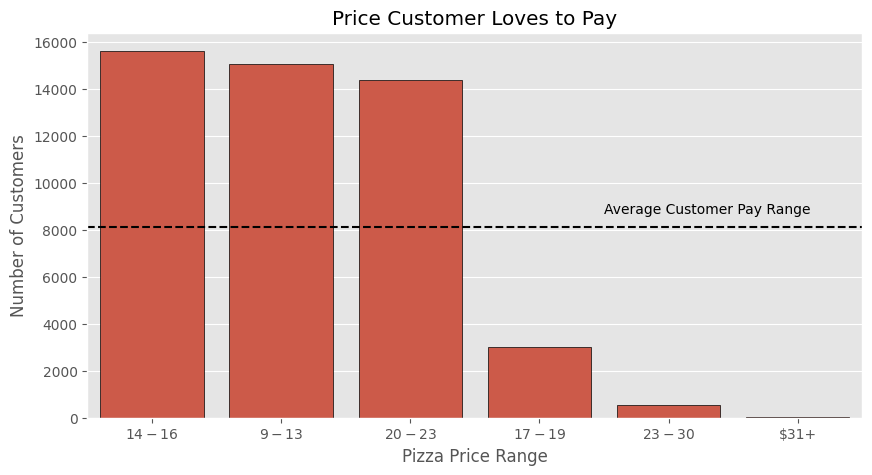

In [26]:
pricebar = df['price_range'].value_counts().reset_index()
fig, ax3 = plt.subplots(figsize =(10,5))
sns.barplot(pricebar, x = 'index', y = 'price_range', ax=ax3, edgecolor='black')
ax3.set_title('Price Customer Loves to Pay')
ax3.axhline(y = pricebar['price_range'].mean(), linestyle ='--', color = 'black')
ax3.text(3.5,8700,'Average Customer Pay Range')
ax3.set_xlabel('Pizza Price Range')
ax3.set_ylabel('Number of Customers')
plt.show()

In [89]:
rangedf = df[df['price_range'].isin(['$14-$16','$17-$19','$20-$23'])]
rangedf.groupby(['month'])['quantity'].sum().reset_index().rename(
    columns = {'quantity':'quantity_sold'}).sort_values(ascending = False, by = 'quantity_sold').style.background_gradient('Reds_r')

### Pizza Price Range and Size sales Relation

In [28]:
filterdf4 = df.groupby(['price_range', 'size'])['name'].count().reset_index()

# Filter for 'name' > 0 (before applying styling)
filterdf4_filtered = filterdf4[filterdf4['name'] > 0]

# Apply styling with background_gradient (assuming Styler is imported)
filterdf4_styled = filterdf4_filtered.sort_values(ascending = False, by = 'name').rename(columns = {'name':'Sold'}).style.background_gradient('RdBu')

# Print the styled DataFrame
filterdf4_styled

### Distribution of Ingredients used on Pizza

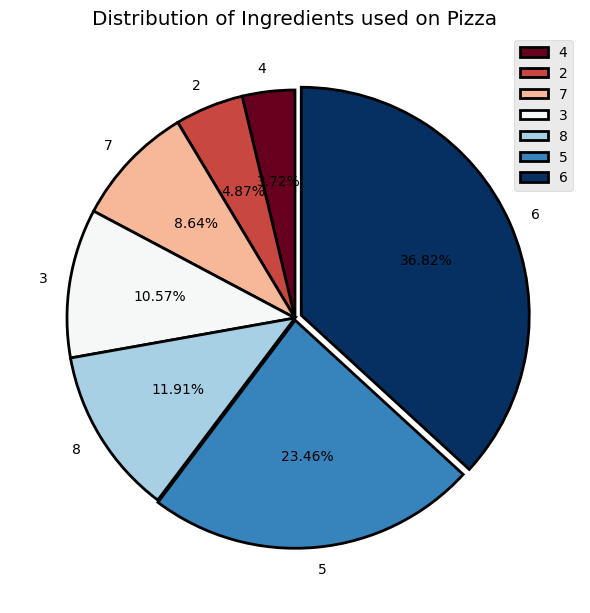

In [67]:
df['number_of_ingredients'].value_counts(ascending=True).plot(kind='pie', colormap='RdBu', shadow=False, figsize=(6, 8), autopct='%1.2f%%',
                                                              explode=[0.0, 0.0, 0.0, 0.0, 0.0, 0.01, 0.03],startangle = 90,
        wedgeprops = {"edgecolor" : "black",
                      'linewidth': 2,
                      'antialiased': True})
plt.ylabel('')
plt.title('Distribution of Ingredients used on Pizza')

plt.gca().set_aspect("equal")
plt.tight_layout()
plt.legend()
plt.show()

### Days with most Customer

In [29]:
weekdf = df['week_day'].value_counts()
correct_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekdf = weekdf.reindex(correct_order)
weekdf = weekdf.reset_index().rename(columns = {'index':'day','week_day':'customer'})
weekdf['day'] = weekdf['day'].str[:3]

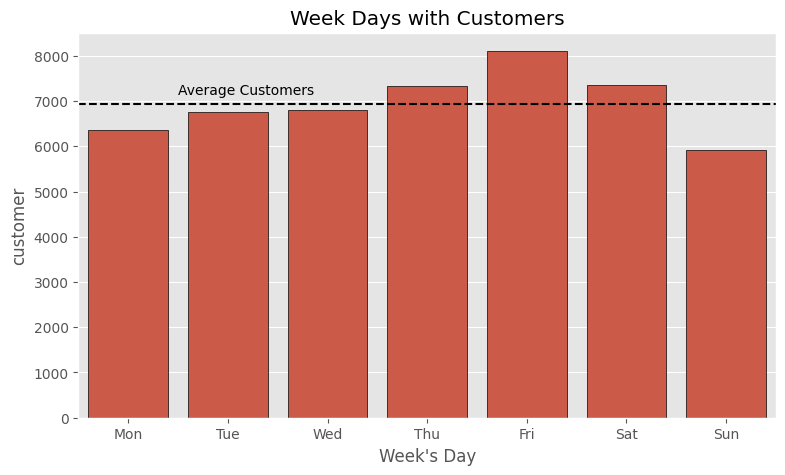

In [30]:
fig, ax4 = plt.subplots(figsize = (9,5))
sns.barplot(weekdf, x = 'day', y = 'customer', legend = True, edgecolor='black')
plt.axhline(y = weekdf['customer'].mean(), linestyle = '--', color = 'black')
plt.text(0.5,weekdf['customer'].mean()+200,'Average Customers')
plt.xlabel("Week's Day")
plt.title('Week Days with Customers')
plt.show()

### Top 5 Pizza name by Month

In [31]:
pizzamonth = df.groupby(['month','name'])['quantity'].sum().sort_values(ascending = False).reset_index().rename(columns
                                                                                                                    = {'quantity':'total_sold'})
pizzamonth.groupby('name')['total_sold'].sum().sort_values(ascending = False).reset_index().head(10).style.background_gradient('summer')

### Price Distribution by Quantity Sold

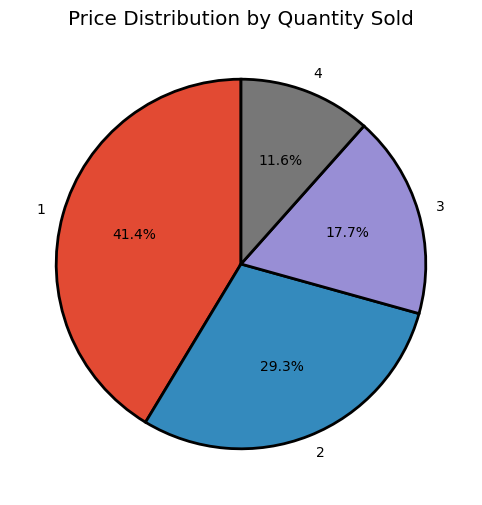

In [65]:
pricepie = df.groupby(['quantity'])['price'].sum().reset_index()
pricepie['price'] = np.log(pricepie['price'])
fig, axs = plt.subplots(1,1, figsize=(12, 6))

# Plot the first pie chart
axs.pie(pricepie['price'], labels=pricepie['quantity'], autopct='%1.1f%%',startangle = 90,
        wedgeprops = {"edgecolor" : "black",
                      'linewidth': 2,
                      'antialiased': True})
axs.set_title("Price Distribution by Quantity Sold")

# Plot the second pie chart (you can customize this one as needed)
# axs[1].pie(...)

plt.show()

# Conclusion

### 1. `12 ,13 ,17 ,18 and 19` are the peaks hours of pizza shop.
### 2. `'July', 'May', 'March', 'November', 'January' and 'April'` have the highest sales more than the average sales.
### 3. `June ` is average and `April` is close to average and remainig month sales lower than calculated average sales.
### 4.  By Customer,s Preferences, upto 30% order classic category pizza and upto 40% order large pizza.
### 5. Top Selling Pizza of Each Category
<table>
  <thead>
    <tr>
      <th><h5>Category</h5></th>
      <th><h5>Pizza Name</h5></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td><h5>Classic</h5></td>
      <td><h5>The Classic Deluxe Pizza</h5></td>
    </tr>
    <tr>
      <td><h5>Veggie</h5></td>
      <td><h5>The Four Cheese Pizza</h5></td>
    </tr>
    <tr>
      <td><h5>Supreme</h5></td>
      <td><h5>The Sicilian Pizza</h5></td>
    </tr>
    <tr>
      <td><h5>Chicken</h5></td>
      <td><h5>The Barbecue Chicken Pizza</h5></td>
    </tr>
  </tbody>
</table>

### 6. Price range `'$14-$16','$17-$19','$20-$23'` customer loves and higher then the average customer pay range.
### 7. upto 40 percents customer buys pizza with 6 ingredients and highest among the other number of ingredients.
### 8. Thrusday, Friday and Saturday are most busiet days of week and suprisinly Sunday has the lowest customer than average.
### 9. Top most pizza by month and year is either chciken based or pepperoni pizza.
### 10. Many customer order 1 pizza followed by 2,3 and 4.